/tmp/ipykernel_8810/2066018675.py:132: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax6.boxplot(correlation_data, labels=box_labels, patch_artist=True)


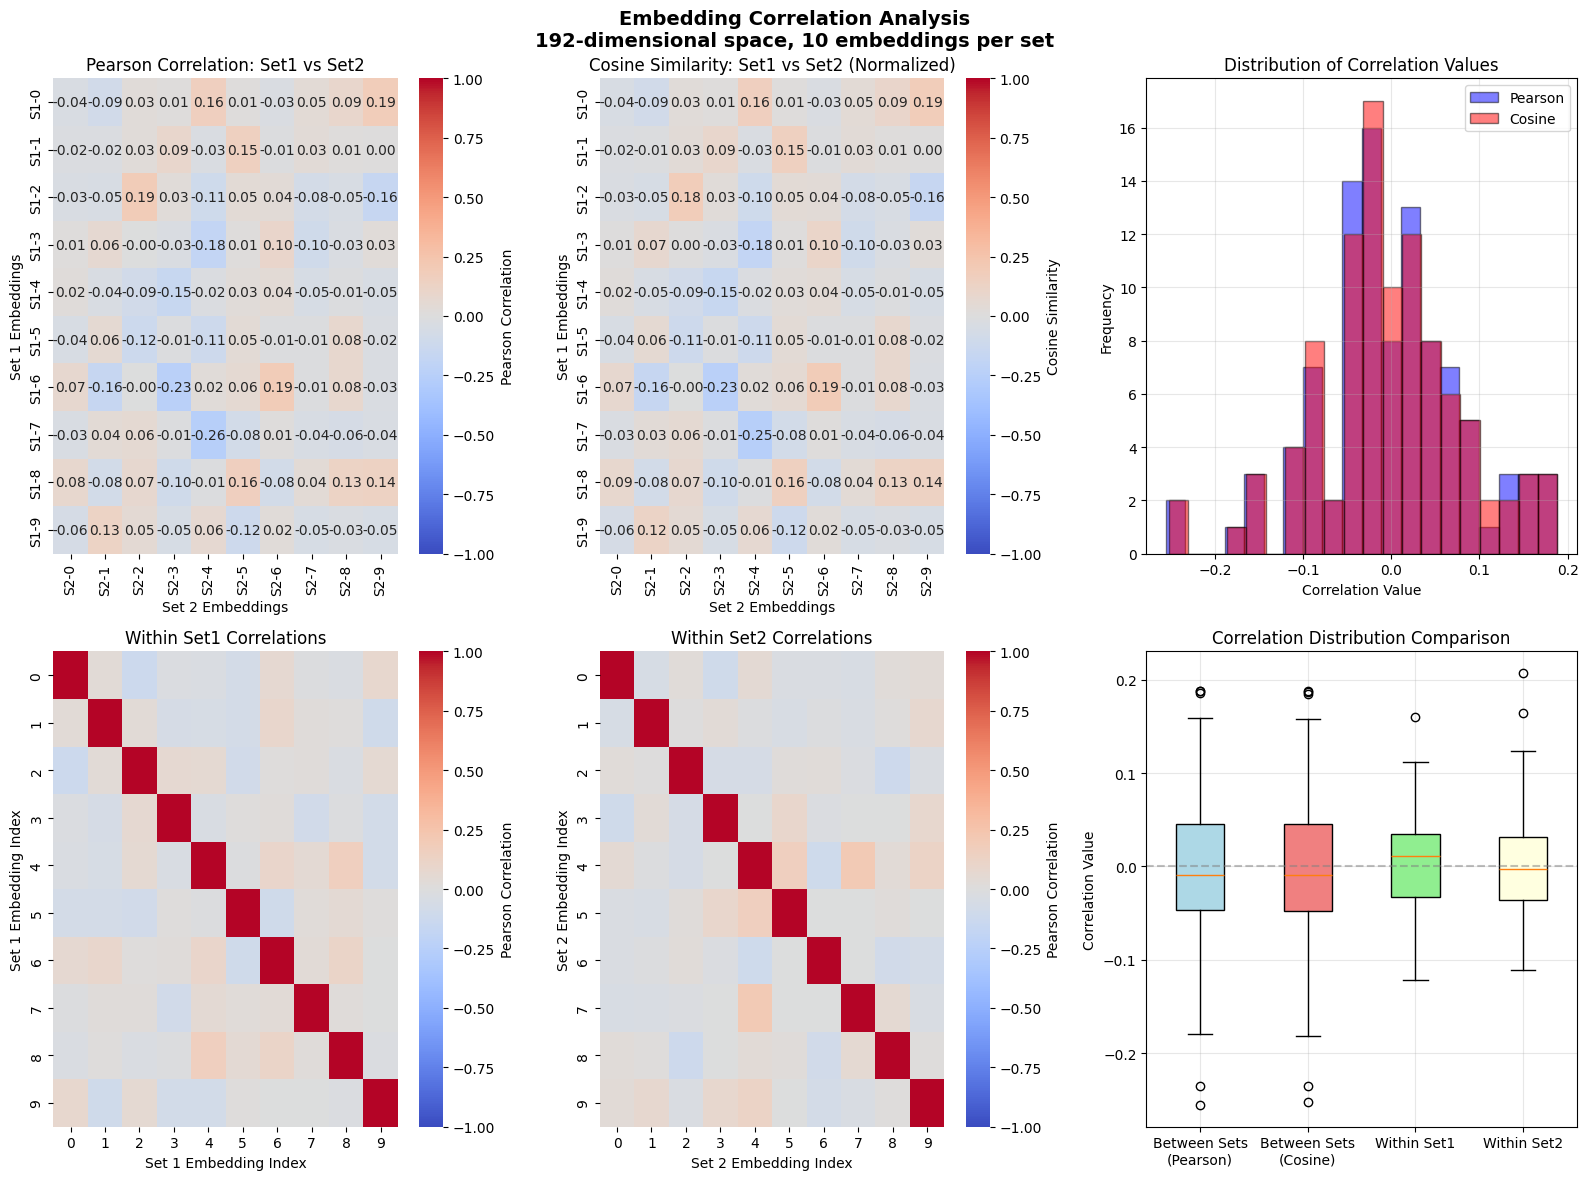

CORRELATION ANALYSIS SUMMARY

Pearson Correlation (Set1 vs Set2):
  Mean: -0.0027
  Std:  0.0842
  Min:  -0.2556
  Max:  0.1883

Cosine Similarity (Set1 vs Set2, normalized):
  Mean: -0.0028
  Std:  0.0839
  Min:  -0.2524
  Max:  0.1884

Most correlated pair (Pearson):
  Set1[6] <-> Set2[6]: 0.1883

Least correlated pair (Pearson):
  Set1[7] <-> Set2[4]: -0.2556

AVERAGE CORRELATION PER EMBEDDING

Set1 embeddings (average correlation with Set2):
  Embedding 0: 0.0377
  Embedding 1: 0.0236
  Embedding 2: -0.0163
  Embedding 3: -0.0119
  Embedding 4: -0.0317
  Embedding 5: -0.0142
  Embedding 6: -0.0011
  Embedding 7: -0.0405
  Embedding 8: 0.0352
  Embedding 9: -0.0082

Set2 embeddings (average correlation with Set1):
  Embedding 0: -0.0042
  Embedding 1: -0.0145
  Embedding 2: 0.0223
  Embedding 3: -0.0458
  Embedding 4: -0.0467
  Embedding 5: 0.0318
  Embedding 6: 0.0274
  Embedding 7: -0.0218
  Embedding 8: 0.0230
  Embedding 9: 0.0012


In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.metrics.pairwise import cosine_similarity

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Create two sets of embeddings (10 embeddings each, 192-dimensional)
# Using random tensors for demonstration - replace with your actual embeddings
embedding_dim = 192
num_embeddings = 10

# Generate sample embeddings (replace these with your actual data)
set1 = torch.randn(num_embeddings, embedding_dim)
set2 = torch.randn(num_embeddings, embedding_dim)

# Normalize embeddings (optional but common for embedding spaces)
set1_normalized = torch.nn.functional.normalize(set1, p=2, dim=1)
set2_normalized = torch.nn.functional.normalize(set2, p=2, dim=1)

def calculate_correlations(tensor1, tensor2, method='pearson'):
    """
    Calculate correlation between two sets of embeddings.
    
    Args:
        tensor1: First set of embeddings (n x d)
        tensor2: Second set of embeddings (m x d)
        method: 'pearson', 'cosine', or 'both'
    
    Returns:
        Correlation matrix (n x m)
    """
    # Convert to numpy for easier computation
    arr1 = tensor1.numpy()
    arr2 = tensor2.numpy()
    
    n, d = arr1.shape
    m, _ = arr2.shape
    
    if method == 'pearson':
        # Calculate Pearson correlation for each pair
        corr_matrix = np.zeros((n, m))
        for i in range(n):
            for j in range(m):
                corr_matrix[i, j], _ = pearsonr(arr1[i], arr2[j])
        return corr_matrix
    
    elif method == 'cosine':
        # Calculate cosine similarity
        return cosine_similarity(arr1, arr2)
    
    elif method == 'both':
        pearson_corr = calculate_correlations(tensor1, tensor2, 'pearson')
        cosine_corr = calculate_correlations(tensor1, tensor2, 'cosine')
        return pearson_corr, cosine_corr

# Calculate correlations using different methods
pearson_corr = calculate_correlations(set1, set2, method='pearson')
cosine_corr = calculate_correlations(set1_normalized, set2_normalized, method='cosine')

# Calculate within-set correlations for comparison
within_set1_corr = calculate_correlations(set1, set1, method='pearson')
within_set2_corr = calculate_correlations(set2, set2, method='pearson')

# Visualization
fig = plt.figure(figsize=(16, 12))

# 1. Pearson Correlation Heatmap (between sets)
ax1 = plt.subplot(2, 3, 1)
sns.heatmap(pearson_corr, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            vmin=-1, vmax=1, cbar_kws={'label': 'Pearson Correlation'},
            xticklabels=[f'S2-{i}' for i in range(num_embeddings)],
            yticklabels=[f'S1-{i}' for i in range(num_embeddings)])
ax1.set_title('Pearson Correlation: Set1 vs Set2')
ax1.set_xlabel('Set 2 Embeddings')
ax1.set_ylabel('Set 1 Embeddings')

# 2. Cosine Similarity Heatmap (between sets)
ax2 = plt.subplot(2, 3, 2)
sns.heatmap(cosine_corr, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            vmin=-1, vmax=1, cbar_kws={'label': 'Cosine Similarity'},
            xticklabels=[f'S2-{i}' for i in range(num_embeddings)],
            yticklabels=[f'S1-{i}' for i in range(num_embeddings)])
ax2.set_title('Cosine Similarity: Set1 vs Set2 (Normalized)')
ax2.set_xlabel('Set 2 Embeddings')
ax2.set_ylabel('Set 1 Embeddings')

# 3. Distribution of correlation values
ax3 = plt.subplot(2, 3, 3)
ax3.hist(pearson_corr.flatten(), bins=20, alpha=0.5, label='Pearson', color='blue', edgecolor='black')
ax3.hist(cosine_corr.flatten(), bins=20, alpha=0.5, label='Cosine', color='red', edgecolor='black')
ax3.set_xlabel('Correlation Value')
ax3.set_ylabel('Frequency')
ax3.set_title('Distribution of Correlation Values')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Within-Set1 Correlation
ax4 = plt.subplot(2, 3, 4)
sns.heatmap(within_set1_corr, annot=False, cmap='coolwarm', center=0,
            vmin=-1, vmax=1, cbar_kws={'label': 'Pearson Correlation'},
            xticklabels=[f'{i}' for i in range(num_embeddings)],
            yticklabels=[f'{i}' for i in range(num_embeddings)])
ax4.set_title('Within Set1 Correlations')
ax4.set_xlabel('Set 1 Embedding Index')
ax4.set_ylabel('Set 1 Embedding Index')

# 5. Within-Set2 Correlation
ax5 = plt.subplot(2, 3, 5)
sns.heatmap(within_set2_corr, annot=False, cmap='coolwarm', center=0,
            vmin=-1, vmax=1, cbar_kws={'label': 'Pearson Correlation'},
            xticklabels=[f'{i}' for i in range(num_embeddings)],
            yticklabels=[f'{i}' for i in range(num_embeddings)])
ax5.set_title('Within Set2 Correlations')
ax5.set_xlabel('Set 2 Embedding Index')
ax5.set_ylabel('Set 2 Embedding Index')

# 6. Box plot comparison
ax6 = plt.subplot(2, 3, 6)
correlation_data = [
    pearson_corr.flatten(),
    cosine_corr.flatten(),
    within_set1_corr[np.triu_indices(num_embeddings, k=1)],
    within_set2_corr[np.triu_indices(num_embeddings, k=1)]
]
box_labels = ['Between Sets\n(Pearson)', 'Between Sets\n(Cosine)', 
              'Within Set1', 'Within Set2']
bp = ax6.boxplot(correlation_data, labels=box_labels, patch_artist=True)
colors = ['lightblue', 'lightcoral', 'lightgreen', 'lightyellow']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
ax6.set_ylabel('Correlation Value')
ax6.set_title('Correlation Distribution Comparison')
ax6.grid(True, alpha=0.3)
ax6.axhline(y=0, color='gray', linestyle='--', alpha=0.5)

plt.suptitle('Embedding Correlation Analysis\n192-dimensional space, 10 embeddings per set', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Print summary statistics
print("=" * 60)
print("CORRELATION ANALYSIS SUMMARY")
print("=" * 60)
print(f"\nPearson Correlation (Set1 vs Set2):")
print(f"  Mean: {pearson_corr.mean():.4f}")
print(f"  Std:  {pearson_corr.std():.4f}")
print(f"  Min:  {pearson_corr.min():.4f}")
print(f"  Max:  {pearson_corr.max():.4f}")

print(f"\nCosine Similarity (Set1 vs Set2, normalized):")
print(f"  Mean: {cosine_corr.mean():.4f}")
print(f"  Std:  {cosine_corr.std():.4f}")
print(f"  Min:  {cosine_corr.min():.4f}")
print(f"  Max:  {cosine_corr.max():.4f}")

# Find most and least correlated pairs
max_pearson_idx = np.unravel_index(pearson_corr.argmax(), pearson_corr.shape)
min_pearson_idx = np.unravel_index(pearson_corr.argmin(), pearson_corr.shape)

print(f"\nMost correlated pair (Pearson):")
print(f"  Set1[{max_pearson_idx[0]}] <-> Set2[{max_pearson_idx[1]}]: {pearson_corr[max_pearson_idx]:.4f}")

print(f"\nLeast correlated pair (Pearson):")
print(f"  Set1[{min_pearson_idx[0]}] <-> Set2[{min_pearson_idx[1]}]: {pearson_corr[min_pearson_idx]:.4f}")

# Additional analysis: Average correlation per embedding
print("\n" + "=" * 60)
print("AVERAGE CORRELATION PER EMBEDDING")
print("=" * 60)

avg_corr_set1 = pearson_corr.mean(axis=1)
avg_corr_set2 = pearson_corr.mean(axis=0)

print("\nSet1 embeddings (average correlation with Set2):")
for i, avg in enumerate(avg_corr_set1):
    print(f"  Embedding {i}: {avg:.4f}")

print("\nSet2 embeddings (average correlation with Set1):")
for i, avg in enumerate(avg_corr_set2):
    print(f"  Embedding {i}: {avg:.4f}")

# Function to load your actual embeddings
def load_your_embeddings():
    """
    Replace this function with your actual embedding loading logic.
    
    Example:
    set1 = torch.load('path_to_set1.pt')
    set2 = torch.load('path_to_set2.pt')
    
    Or if using a model:
    model = YourModel()
    set1 = model.encode(data1)
    set2 = model.encode(data2)
    
    return set1, set2
    """
    pass

# Uncomment and modify to use your actual embeddings:
# set1, set2 = load_your_embeddings()
# Then re-run the correlation calculations and visualizations